#```Netflix```

Netflix is an American subscription video on-demand over-the-top streaming television service owned and operated by Netflix, Inc., a company based in Los Gatos, California. It offers films and television series from various genres, and it is available in multiple languages.

Netflix was launched on January 16, 2007, nearly a decade after Netflix, Inc. began its DVD-by-mail service. With over 232 million paid memberships in more than 190 countries, it is the most-subscribed video on demand streaming service. By 2022, original productions accounted for half of Netflix's library in the United States, and the company had ventured into other categories, such as video game publishing via the Netflix service.

#```Problem Statement```

Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Importing the Data
df= pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv")

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

##<font color="red" face='georgia'>Features Description</font>

Dataset contains 8k rows and 12 columns.

Following are the description of features:

1. Show_id: Unique ID for every Movie / Tv Show

2. Type: Identifier - A Movie or TV Show

3. Title: Title of the Movie / Tv Show

4. Director: Director of the Movie

5. Cast: Actors involved in the movie/show

6. Country: Country where the movie/show was produced

7. Date_added: Date it was added on Netflix

8. Release_year: Actual Release year of the movie/show

9. Rating: TV Rating of the movie/show

10. Duration: Total Duration - in minutes or number of seasons

11. Listed_in: Genre

12. Description: The summary description


In [ ]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#We are converting the datatype of date_added from object to datetime.
df["date_added"]= pd.to_datetime(df['date_added'])

In [ ]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

The Data has only one integer value that is release_year else all are object.

In [ ]:
#Changing cast datatype from 'Object' to 'String'
df["cast"]= df["cast"].astype('str')

In [ ]:
#Changing country datatype from 'Object' to 'String'
df["country"]=df["country"].values.astype('str')

In [ ]:
#Removing extra spaces from datapoints
df['type']= df['type'].str.strip()
df['title']= df['title'].str.strip()
df['director']= df['director'].str.strip()
df['cast']= df['cast'].str.strip()
df['listed_in']= df['listed_in'].str.strip()
df['description']= df['description'].str.strip()

In [ ]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [ ]:
#Printing the unique values in each column.
for column in df.columns:
  print(f'{column} : {len(df[column].unique())}')

show_id : 8807
type : 2
title : 8806
director : 4529
cast : 7693
country : 749
date_added : 1715
release_year : 74
rating : 18
duration : 221
listed_in : 514
description : 8775


In [ ]:
#This shows missing values in each column.
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast               0
country            0
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

This shows most of the Null values are present in director column.

In [ ]:
# This describes the whole data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


8807 movies and TV Shows have been released on Netflix between year 1925 to 2021.

In [ ]:
#We have dropped the missing values rows from each column.
df = df[~df['director'].isna()]
df = df[~df['cast'].isna()]
df = df[~df['country'].isna()]
df = df[~df['date_added'].isna()]

In [ ]:
# Number of movies or TV Shows that each country have.
df["country"]= df["country"].str.strip()

In [ ]:
# Countries That have content on Netflix
country_top10=df["country"].str.split(", ").explode().reset_index()
country_top10=country_top10[country_top10["country"]!="nan"]
country_top10


,index,country
0,0,United States
4,7,United States
5,7,Ghana
6,7,Burkina Faso
7,7,United Kingdom
...,...,...
7870,8801,Jordan
7871,8802,United States
7872,8804,United States
7873,8805,United States


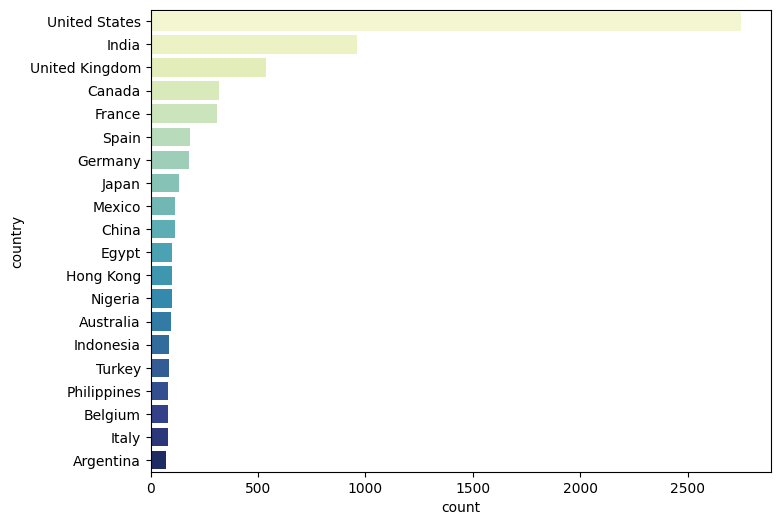

In [ ]:
# Top 10 Countries which have shows on Netflix
plt.figure(figsize=(8,6))
sns.countplot(data=country_top10, y="country", order=country_top10["country"].value_counts().index[:20], palette="YlGnBu")
plt.show()


Hence, Most shows are from United States followed by India.

In [ ]:
df.shape

(6173, 12)

In [ ]:
# Splitting the data for Movies and Tv Shows
df_movies= df[df["type"]=="Movie"]
df_tv= df[df["type"]!="Movie"]

In [ ]:
# Getting the most frequent actor in Movies
movies_cast= df_movies["cast"].str.split(",").explode().value_counts()
# movies_cast.loc[movies_cast.isna()]
movies_cast= movies_cast.reset_index()
movies_cast= movies_cast[movies_cast["index"]!="nan"]


In [ ]:
# Getting the most frequent actors in TV
tv_cast= df_tv["cast"].str.split(",").explode().value_counts()

tv_cast= tv_cast.reset_index()
tv_cast= tv_cast[tv_cast["index"]!="nan"]


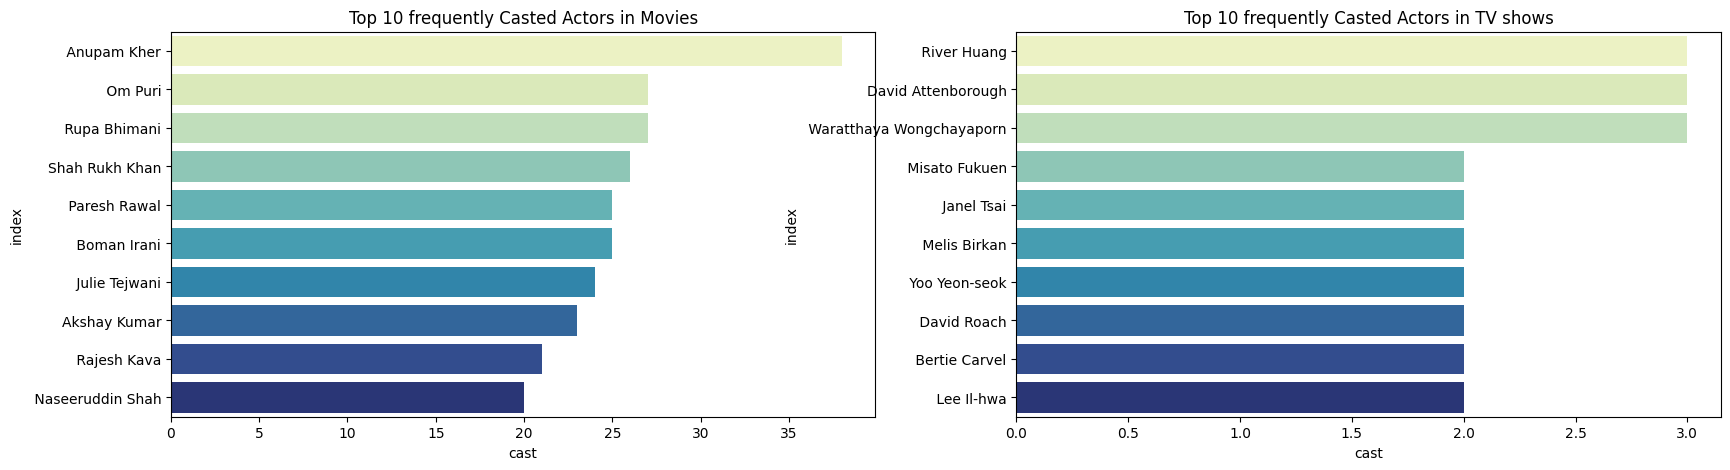

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
colors = ['r','g']
axes = ax.ravel()
movies_cast_top10 = movies_cast.sort_values("cast", ascending=False)[:10]
sns.barplot(data=movies_cast_top10, y="index", x='cast', palette="YlGnBu",ax=axes[0])
axes[0].set_title("Top 10 frequently Casted Actors in Movies")


tv_cast_top10 = tv_cast.sort_values("cast", ascending=False)[:10]
sns.barplot(data=tv_cast_top10, y="index", x='cast', palette="YlGnBu",ax=axes[1])
axes[1].set_title("Top 10 frequently Casted Actors in TV shows")
plt.show()

Netflix has high number of movies where cast includes Anupam Kher followed by Om Puri and high number of TV Shows where cast includes River Huang followed by David Attenborough.

In [ ]:
# Getting Top 10 directors in movies
movies_director= df_movies["director"].str.split(",").explode().value_counts()
# movies_cast.loc[movies_cast.isna()]
movies_director= movies_director.reset_index()
movies_director= movies_director[movies_director["index"]!="nan"]


In [ ]:
# Getting Top 10 directors in TV Shows
tv_director= df_tv["director"].str.split(",").explode().value_counts()

tv_director= tv_director.reset_index()
tv_director= tv_director[tv_director["index"]!="nan"]


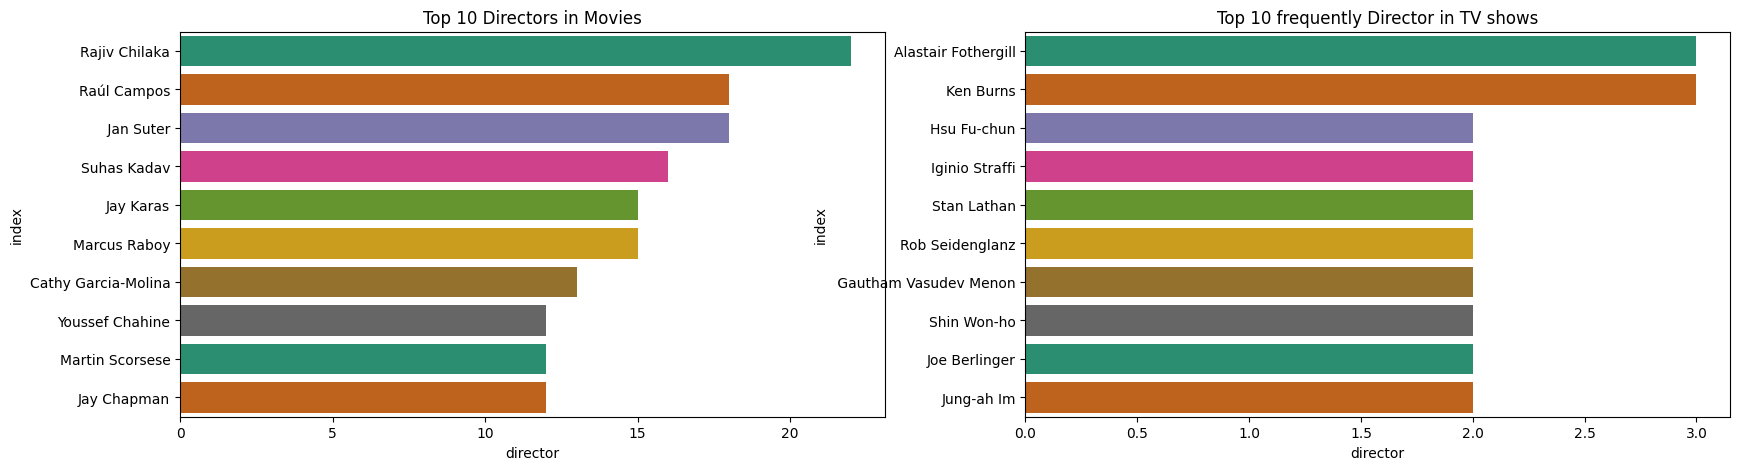

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20,5))
colors = ['r','g']
axes = ax.ravel()
movies_director_top10 = movies_director.sort_values("director", ascending=False)[:10]
sns.barplot(data=movies_director_top10, y="index", x='director', palette="Dark2",ax=axes[0])
axes[0].set_title("Top 10 Directors in Movies")


tv_director_top10 = tv_director.sort_values("director", ascending=False)[:10]
sns.barplot(data=tv_director_top10, y="index", x='director', palette="Dark2",ax=axes[1])
axes[1].set_title("Top 10 frequently Director in TV shows")
plt.show()

Netflix has high number of movies directed by Rajiv Chilaka followed by Raul Campos and Jan Suter. It has high number of TV Shows directed by Alastair Fothergill followed by Ken Burns.

In [ ]:
# Percentage of Ratings given to different movies and TV shows
df_movies["rating"].value_counts(normalize=True)

TV-MA       0.335409
TV-14       0.234433
R           0.133625
TV-PG       0.087008
PG-13       0.082296
PG          0.048132
TV-Y7       0.020700
TV-G        0.019185
TV-Y        0.017671
NR          0.012622
G           0.006900
TV-Y7-FV    0.000673
UR          0.000505
NC-17       0.000337
74 min      0.000168
84 min      0.000168
66 min      0.000168
Name: rating, dtype: float64

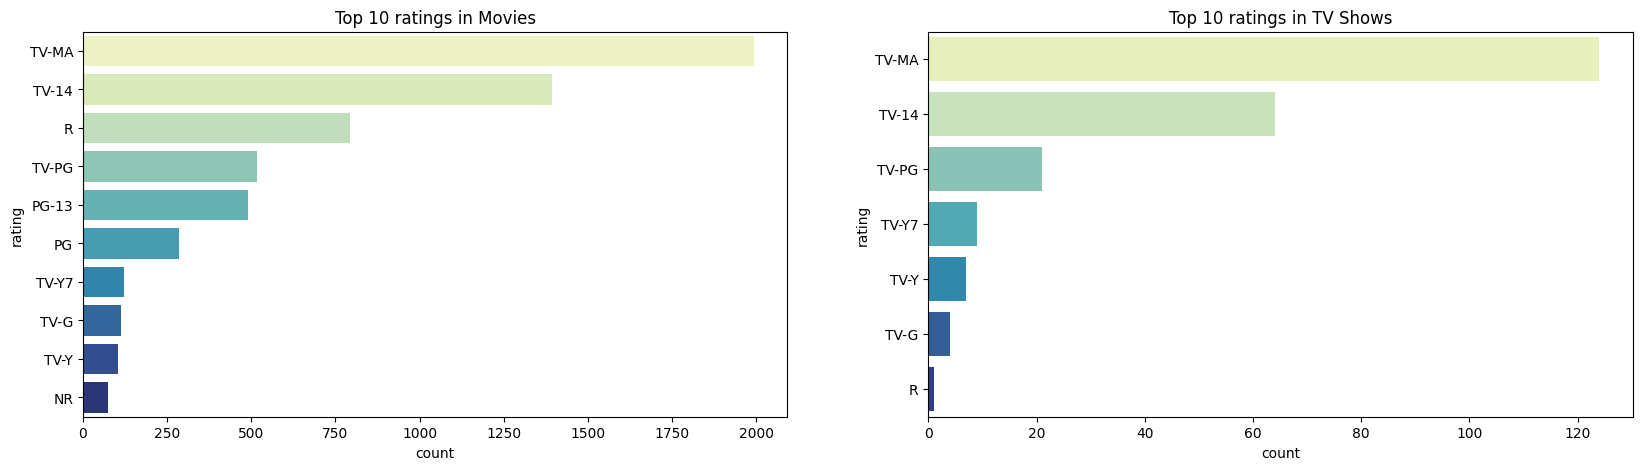

In [ ]:
# Comparing Top 10 ratings in Movies and In Tv Shows
fig, ax = plt.subplots(1, 2, figsize=(20,5))
colors = ['r','g']
axes = ax.ravel()
sns.countplot(data=df_movies, y='rating', order=df_movies['rating'].value_counts().index[:10], palette="YlGnBu", ax=axes[0])
axes[0].set_title("Top 10 ratings in Movies")

sns.countplot(data=df_tv, y='rating', order=df_tv['rating'].value_counts().index[:10], palette="YlGnBu",ax= axes[1])
axes[1].set_title("Top 10 ratings in TV Shows")
plt.show()

'TV-MA' is the highest rating that has been given to most of the movies, followed by 'TV-14' and 'R'. In case of TV Shows highest rating given is 'TV-MA', followed by 'TV-14' and 'TV_PG'.

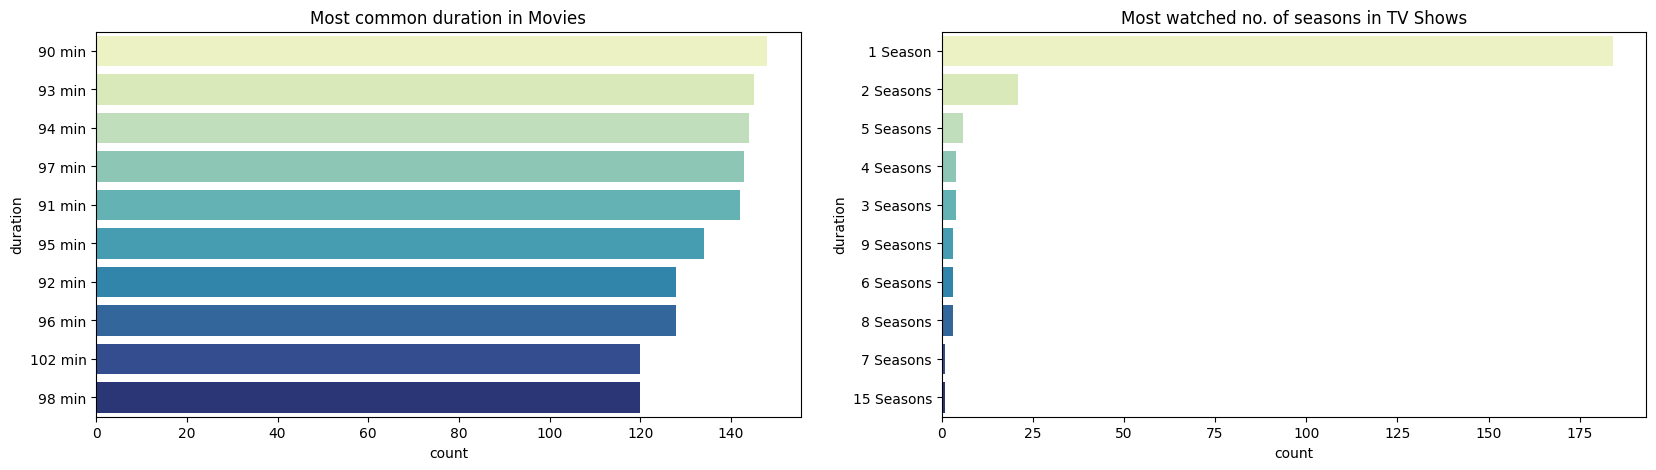

In [ ]:
# Getting Top 10 Most Common Duration for Movies and TV Shows
fig, ax = plt.subplots(1, 2, figsize=(20,5))
colors = ['r','g']
axes = ax.ravel()
sns.countplot(data=df_movies, y='duration', order=df_movies['duration'].value_counts().index[:10], palette="YlGnBu", ax=axes[0])
axes[0].set_title("Most common duration in Movies")

sns.countplot(data=df_tv, y='duration', order=df_tv['duration'].value_counts().index[:10], palette="YlGnBu",ax= axes[1])
axes[1].set_title("Most watched no. of seasons in TV Shows")
plt.show()

Mostly Movies available on Netflix are of 90 minutes, followed by 93 minutes and 94 minutes. In case of TV Shows, mostly TV shows available consists of 1 season, followed by 2 seasons and 5 seasons.

In [ ]:
# # sns.lineplot(data=df_movies,x="country",y="release_year")
# sns.lineplot(data=df_tv,x="country",y="release_year")
# plt.show()
# df_movies.groupby(['country', 'release_year']).count()
# df_movies.groupby("country")["release_year"].count()
df_movies.groupby("country")["release_year"].value_counts()

country            release_year
, France, Algeria  2014            1
Argentina          2018            8
                   2020            7
                   2016            6
                   2019            6
                                  ..
nan                2001            1
                   2003            1
                   2004            1
                   2006            1
                   2008            1
Name: release_year, Length: 1506, dtype: int64

In [ ]:
# All Genres available on Netflix
df_movies["listed_in"].str.split(",").explode().value_counts()

 International Movies        2582
Dramas                       1587
Comedies                     1186
Action & Adventure            851
 Dramas                       815
Documentaries                 777
 Independent Movies           731
 Romantic Movies              602
Children & Family Movies      570
 Thrillers                    510
 Comedies                     456
 Music & Musicals             340
Stand-Up Comedy               309
Horror Movies                 274
 Sci-Fi & Fantasy             227
 Sports Movies                212
International Movies          123
 LGBTQ Movies                  97
 Horror Movies                 81
Classic Movies                 80
 Faith & Spirituality          65
Thrillers                      65
 Cult Movies                   59
 Anime Features                50
 Classic Movies                36
 Children & Family Movies      35
 Documentaries                 35
Movies                         34
Anime Features                 20
Independent Mo

In [ ]:
# Getting all genres available in Movies
movies_genre= df_movies["listed_in"].str.split(",").explode().value_counts()
movies_genre= movies_genre.reset_index()
movies_genre= movies_genre[movies_genre["index"]!="nan"]

In [ ]:
# Getting all genres available in TV Shows
tv_genre = df_tv["listed_in"].str.split(",").explode().value_counts()

tv_genre= tv_genre.reset_index()
tv_genre= tv_genre[tv_genre["index"]!="nan"]


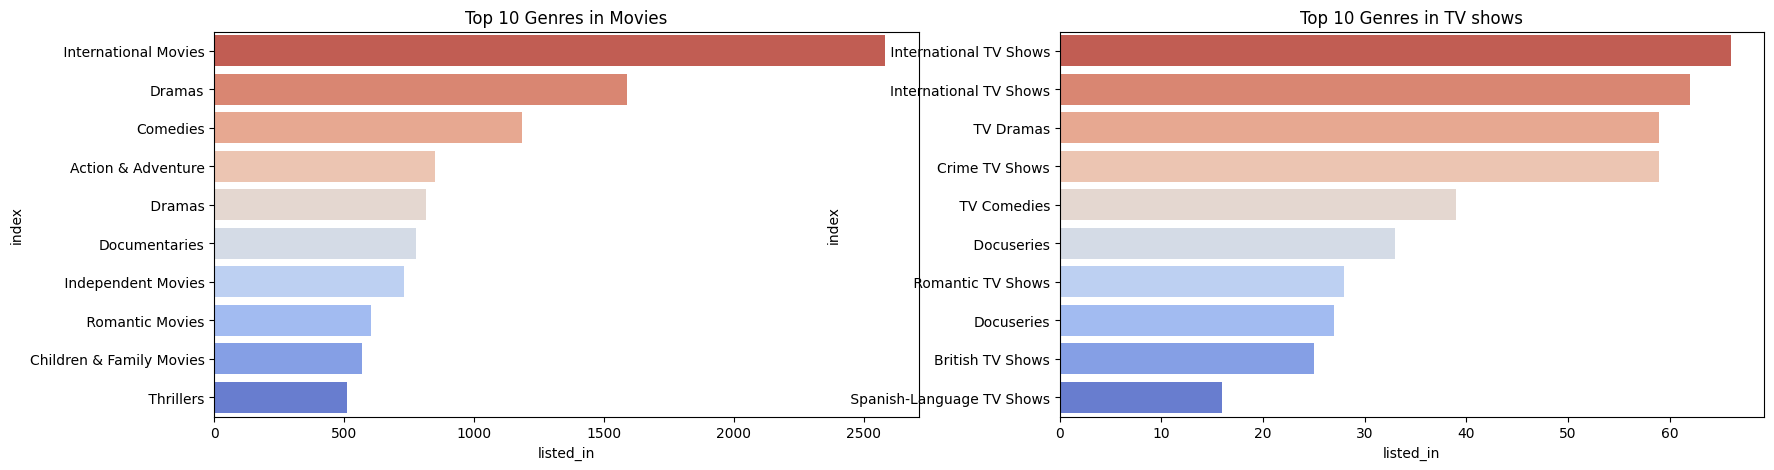

In [ ]:
# Top 10 genres in Movies and TV Shows
fig, ax = plt.subplots(1, 2, figsize=(20,5))
colors = ['r','g']
axes = ax.ravel()
movies_genre_top10 = movies_genre.sort_values("listed_in", ascending=False)[:10]
sns.barplot(data=movies_genre_top10, y="index", x='listed_in', palette="coolwarm_r",ax=axes[0])
axes[0].set_title("Top 10 Genres in Movies")


tv_genre_top10 = tv_genre.sort_values("listed_in", ascending=False)[:10]
sns.barplot(data=tv_genre_top10, y="index", x='listed_in', palette="coolwarm_r",ax=axes[1])
axes[1].set_title("Top 10 Genres in TV shows")
plt.show()



International movies and TV Shows are the most commonly available on Netflix, followed by Dramas and Comedies in Movies and followed by Drama and Crime in TV Shows.

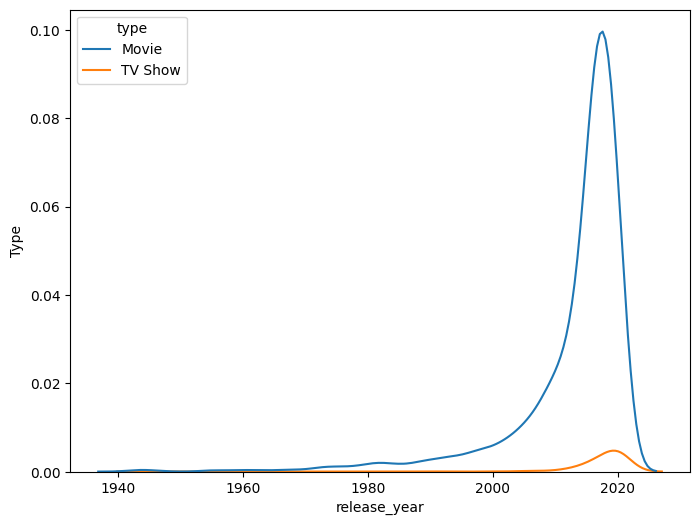

In [ ]:
# No. of Movies and TV Shows released per year
plt.figure(figsize=(8,6))
sns.kdeplot(x='release_year',
 hue='type',
 data=df).set_ylabel("Type")
plt.show()


Most of the Movies and TV Shows available on Netflix were released around 2020.

In [ ]:
df["type"].value_counts()

Movie      5943
TV Show     230
Name: type, dtype: int64

In [ ]:
# Splitting Director Names and making a list
c1= df["director"].apply(lambda x: str(x).split(",")).tolist()
c1[:20]

[['Kirsten Johnson'],
 ['Julien Leclercq'],
 ['Mike Flanagan'],
 ['Robert Cullen', ' José Luis Ucha'],
 ['Haile Gerima'],
 ['Andy Devonshire'],
 ['Theodore Melfi'],
 ['Kongkiat Komesiri'],
 ['Christian Schwochow'],
 ['Bruno Garotti'],
 ['Pedro de Echave García', ' Pablo Azorín Williams'],
 ['Adam Salky'],
 ['Olivier Megaton'],
 ['K.S. Ravikumar'],
 ['Alex Woo', ' Stanley Moore'],
 ['S. Shankar'],
 ['Rajiv Menon'],
 ['Dennis Dugan'],
 ['Scott Stewart'],
 ['Robert Luketic']]

In [ ]:
# Converting list of Names of Directors to a DataFrame
df_new1=pd.DataFrame(c1,index=df["title"])
df_new1

,0,1,2,3,4,5,6,7,8,9,10,11,12
title,,,,,,,,,,,,,
Dick Johnson Is Dead,Kirsten Johnson,None,None,None,None,None,None,None,None,None,None,None,None
Ganglands,Julien Leclercq,None,None,None,None,None,None,None,None,None,None,None,None
Midnight Mass,Mike Flanagan,None,None,None,None,None,None,None,None,None,None,None,None
My Little Pony: A New Generation,Robert Cullen,José Luis Ucha,None,None,None,None,None,None,None,None,None,None,None
Sankofa,Haile Gerima,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zinzana,Majid Al Ansari,None,None,None,None,None,None,None,None,None,None,None,None
Zodiac,David Fincher,None,None,None,None,None,None,None,None,None,None,None,None
Zombieland,Ruben Fleischer,None,None,None,None,None,None,None,None,None,None,None,None


In [ ]:
# Stacking the Names of Directors
df_new1= df_new1.stack()
df_new1

title                              
Dick Johnson Is Dead              0    Kirsten Johnson
Ganglands                         0    Julien Leclercq
Midnight Mass                     0      Mike Flanagan
My Little Pony: A New Generation  0      Robert Cullen
                                  1     José Luis Ucha
                                            ...       
Zinzana                           0    Majid Al Ansari
Zodiac                            0      David Fincher
Zombieland                        0    Ruben Fleischer
Zoom                              0       Peter Hewitt
Zubaan                            0        Mozez Singh
Length: 6978, dtype: object

In [ ]:
df_new1=pd.DataFrame(df_new1.reset_index())
df_new1

,title,level_1,0
0,Dick Johnson Is Dead,0,Kirsten Johnson
1,Ganglands,0,Julien Leclercq
2,Midnight Mass,0,Mike Flanagan
3,My Little Pony: A New Generation,0,Robert Cullen
4,My Little Pony: A New Generation,1,José Luis Ucha
...,...,...,...
6973,Zinzana,0,Majid Al Ansari
6974,Zodiac,0,David Fincher
6975,Zombieland,0,Ruben Fleischer
6976,Zoom,0,Peter Hewitt


In [ ]:
# Renaming the columns
df_new1.rename(columns={0:"Directors"},inplace=True)
df_new1

,title,level_1,Directors
0,Dick Johnson Is Dead,0,Kirsten Johnson
1,Ganglands,0,Julien Leclercq
2,Midnight Mass,0,Mike Flanagan
3,My Little Pony: A New Generation,0,Robert Cullen
4,My Little Pony: A New Generation,1,José Luis Ucha
...,...,...,...
6973,Zinzana,0,Majid Al Ansari
6974,Zodiac,0,David Fincher
6975,Zombieland,0,Ruben Fleischer
6976,Zoom,0,Peter Hewitt


In [ ]:
# Dropping unnecessary columns
df_new1.drop(['level_1'],axis=1,inplace=True)


In [ ]:
# Unnested Director Column
df_new1

,title,Directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Ganglands,Julien Leclercq
2,Midnight Mass,Mike Flanagan
3,My Little Pony: A New Generation,Robert Cullen
4,My Little Pony: A New Generation,José Luis Ucha
...,...,...
6973,Zinzana,Majid Al Ansari
6974,Zodiac,David Fincher
6975,Zombieland,Ruben Fleischer
6976,Zoom,Peter Hewitt


In [ ]:
# Splitting Cast Names and making a list
c2= df["cast"].apply(lambda x: str(x).split(",")).tolist()
# Converting list of Names of Actors to a DataFrame
df_new2=pd.DataFrame(c2,index=df["title"])
# Stacking the Names of Directors
df_new2= df_new2.stack()
df_new2=pd.DataFrame(df_new2.reset_index())
# Renaming the columns
df_new2.rename(columns={0:"Actors"},inplace=True)
# Dropping unnecessary columns
df_new2.drop(['level_1'],axis=1,inplace= True)
df_new2


,title,Actors
0,Dick Johnson Is Dead,nan
1,Ganglands,Sami Bouajila
2,Ganglands,Tracy Gotoas
3,Ganglands,Samuel Jouy
4,Ganglands,Nabiha Akkari
...,...,...
45933,Zubaan,Manish Chaudhary
45934,Zubaan,Meghna Malik
45935,Zubaan,Malkeet Rauni
45936,Zubaan,Anita Shabdish


In [ ]:
# Splitting Country names and making a list
c3= df["country"].apply(lambda x: str(x).split(",")).tolist()
# Converting List to DataFrame
df_new3= pd.DataFrame(c3,index=df["title"])
# Stacking the country Names
df_new3= df_new3.stack()
df_new3= pd.DataFrame(df_new3.reset_index())
# Renaming the columns
df_new3.rename(columns={0:"countries"},inplace=True)
# Dropping unnecessary columns
df_new3.drop(['level_1'],axis=1,inplace= True)
df_new3

,title,countries
0,Dick Johnson Is Dead,United States
1,Ganglands,nan
2,Midnight Mass,nan
3,My Little Pony: A New Generation,nan
4,Sankofa,United States
...,...,...
7875,Zinzana,Jordan
7876,Zodiac,United States
7877,Zombieland,United States
7878,Zoom,United States


In [ ]:
# Splitting Genre names and making a list
c4= df["listed_in"].apply(lambda x: str(x).split(",")).tolist()
# Converting List to DataFrame
df_new4= pd.DataFrame(c4,index=df["title"])
# Stacking the country Names
df_new4= df_new4.stack()
df_new4= pd.DataFrame(df_new4.reset_index())
# Renaming the columns
df_new4.rename(columns={0:"Genre"},inplace=True)
# Dropping unnecessary columns
df_new4.drop(['level_1'],axis=1,inplace= True)
df_new4

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Ganglands,Crime TV Shows
2,Ganglands,International TV Shows
3,Ganglands,TV Action & Adventure
4,Midnight Mass,TV Dramas
...,...,...
13434,Zoom,Children & Family Movies
13435,Zoom,Comedies
13436,Zubaan,Dramas
13437,Zubaan,International Movies


In [ ]:
# merging the unnested director data with unnested actor data
df_new5= df_new2.merge(df_new1,on=['title'],how='inner')
# merging the above merged data with unnested country data
df_new6= df_new5.merge(df_new3,on=['title'],how='inner')
# merging the above merged data with unnested genre data
df_new7= df_new6.merge(df_new4,on=['title'],how='inner')
df_new7

,title,Actors,Directors,countries,Genre
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries
1,Ganglands,Sami Bouajila,Julien Leclercq,nan,Crime TV Shows
2,Ganglands,Sami Bouajila,Julien Leclercq,nan,International TV Shows
3,Ganglands,Sami Bouajila,Julien Leclercq,nan,TV Action & Adventure
4,Ganglands,Tracy Gotoas,Julien Leclercq,nan,Crime TV Shows
...,...,...,...,...,...
151753,Zubaan,Anita Shabdish,Mozez Singh,India,International Movies
151754,Zubaan,Anita Shabdish,Mozez Singh,India,Music & Musicals
151755,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,Dramas
151756,Zubaan,Chittaranjan Tripathy,Mozez Singh,India,International Movies


In [ ]:
# merging unnested data with the original data
df_final= df_new7.merge(df[['show_id','type','title','date_added','release_year','rating','duration']],on=['title'],how='left')
df_final.head()

,title,Actors,Directors,countries,Genre,show_id,type,date_added,release_year,rating,duration
0,Dick Johnson Is Dead,nan,Kirsten Johnson,United States,Documentaries,s1,Movie,2021-09-25,2020,PG-13,90 min
1,Ganglands,Sami Bouajila,Julien Leclercq,nan,Crime TV Shows,s3,TV Show,2021-09-24,2021,TV-MA,1 Season
2,Ganglands,Sami Bouajila,Julien Leclercq,nan,International TV Shows,s3,TV Show,2021-09-24,2021,TV-MA,1 Season
3,Ganglands,Sami Bouajila,Julien Leclercq,nan,TV Action & Adventure,s3,TV Show,2021-09-24,2021,TV-MA,1 Season
4,Ganglands,Tracy Gotoas,Julien Leclercq,nan,Crime TV Shows,s3,TV Show,2021-09-24,2021,TV-MA,1 Season


In [ ]:
# Splitting data into 2 parts movie and TV
movie= pd.DataFrame(df_final[df_final["type"]=="Movie"])
TV= pd.DataFrame(df_final[df_final["type"]!="Movie"])

In [ ]:
# Top 10 Directors who directed most movies on Netflix
top_10= pd.DataFrame(movie.groupby("release_year")[["Directors"]].value_counts().sort_values(ascending=False).reset_index()[:11])
top_10.rename(columns={0:"No_of_movies"},inplace=True)
top_10


,release_year,Directors,No_of_movies
0,2014,Ozan Açıktan,768
1,2013,Lars von Trier,336
2,2013,Ari Folman,210
3,2001,Robert Altman,180
4,2015,Tom Hooper,180
5,2011,Sarah Smith,176
6,2019,Farhad Safinia,176
7,2017,Nora Twomey,168
8,2018,Soudade Kaadan,168
9,2010,Edgar Wright,168


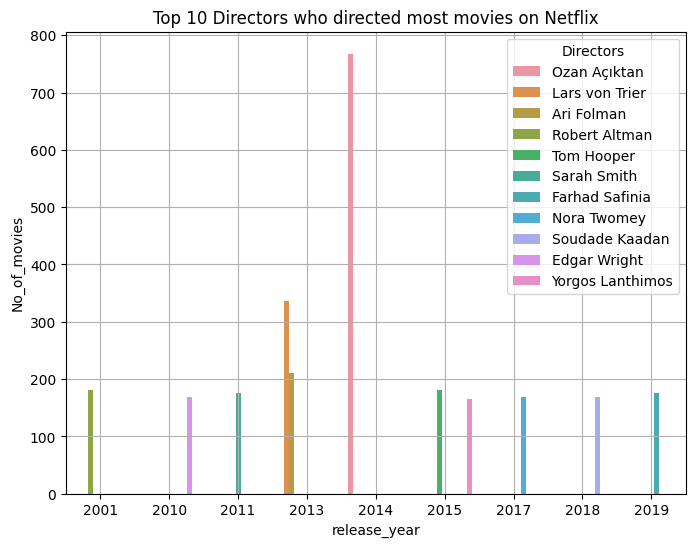

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=top_10,x="release_year",y="No_of_movies",hue="Directors").set_title("Top 10 Directors who directed most movies on Netflix")
plt.grid()
plt.show()

Ozan Aciktan has most released movies on Netflix in the year 2014, followed by Lars von Trier who have most movies released in 2013 and Ari Folman who have most movies released in 2013.

In [ ]:
# Top 10 Directors who directed most TV Shows on Netflix
top_10_tv= pd.DataFrame(TV.groupby("release_year")[["Directors"]].value_counts().sort_values(ascending=False).reset_index()[:11])
top_10_tv.rename(columns={0:"No_of_TV_Shows"},inplace=True)
top_10_tv

,release_year,Directors,No_of_TV_Shows
0,2018,Noam Murro,189
1,2019,Thomas Astruc,160
2,2020,Damien Chazelle,104
3,2020,Alan Poul,104
4,2020,Houda Benyamina,104
5,2020,Laïla Marrakchi,104
6,2016,Alejandro Lozano,90
7,2021,Jay Oliva,81
8,2020,Manolo Caro,78
9,2021,Kongkiat Komesiri,75


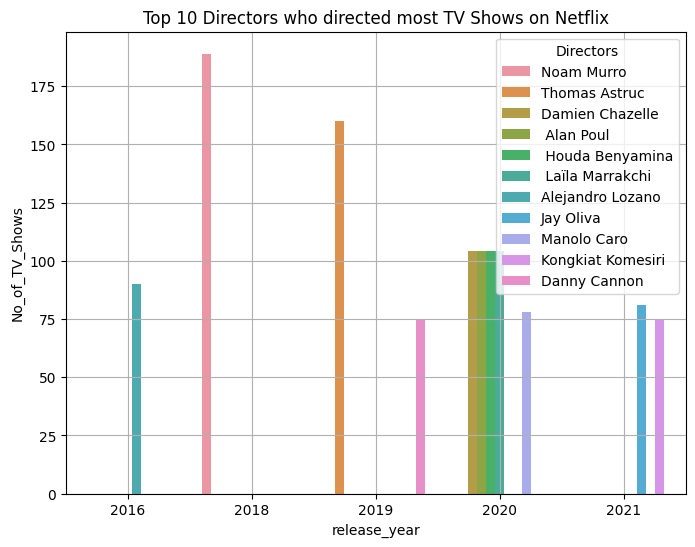

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=top_10_tv,x="release_year",y="No_of_TV_Shows",hue="Directors").set_title("Top 10 Directors who directed most TV Shows on Netflix")
plt.grid()
plt.show()

Nuam Murro has most released TV Shows on Netflix in the year 2018,followed by Thomas Astruc in year 2019 and Damien Chazelle in the year 2020.

In [ ]:
# Most Popular Genre available on Netflix countrywise
df_final["Genre"]=df_final["Genre"].str.strip()
top_genre = pd.DataFrame(df_final.groupby("Genre")[["countries"]].value_counts().sort_values(ascending=False).reset_index())[:20]
top_genre.rename(columns={0:"No_of_movies"},inplace=True)
# nan values to be removed
top_genre


,Genre,countries,No_of_movies
0,Comedies,United States,7450
1,International Movies,India,6880
2,Dramas,United States,6611
3,Dramas,India,5373
4,Children & Family Movies,United States,4093
5,Action & Adventure,United States,3644
6,Independent Movies,United States,3331
7,Comedies,India,2606
8,Thrillers,United States,2176
9,Romantic Movies,United States,1971


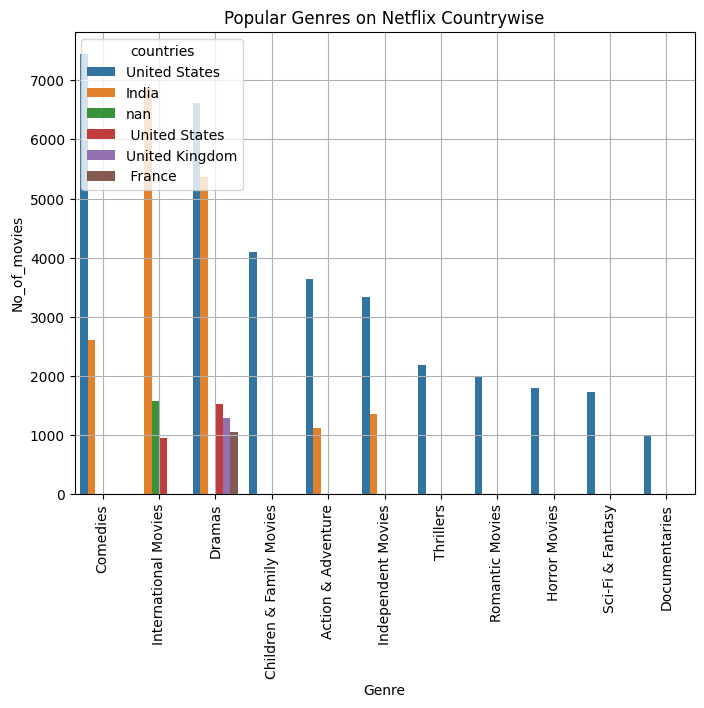

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=top_genre,x="Genre",y="No_of_movies",hue="countries").set_title("Popular Genres on Netflix Countrywise")
plt.xticks(rotation=90)
plt.grid()
plt.show()

Hence, International movies are mostly popular among Indian audience followed by Comedies and Dramas. Similarly In United States Comedies are popular followed by Dramas and Children and Family Movies. Documentaries seems less available in United States. Action and Adventure are available in less number in India.

In [ ]:
# Most Frequently Directed Genres on Netflix
top_directors= pd.DataFrame(df_final.groupby("Genre")[["Directors"]].value_counts().sort_values(ascending=False)).reset_index()[:10]
top_directors.rename(columns={0:"No_of_movies"},inplace=True)
top_directors


,Genre,Directors,No_of_movies
0,International Movies,Ozan Açıktan,294
1,Dramas,Ozan Açıktan,264
2,Thrillers,Ozan Açıktan,256
3,Dramas,Martin Scorsese,163
4,Action & Adventure,Martin Campbell,154
5,Children & Family Movies,Raja Gosnell,154
6,Comedies,Raja Gosnell,154
7,Dramas,Youssef Chahine,150
8,Dramas,Steven Spielberg,140
9,Children & Family Movies,Rajiv Chilaka,139


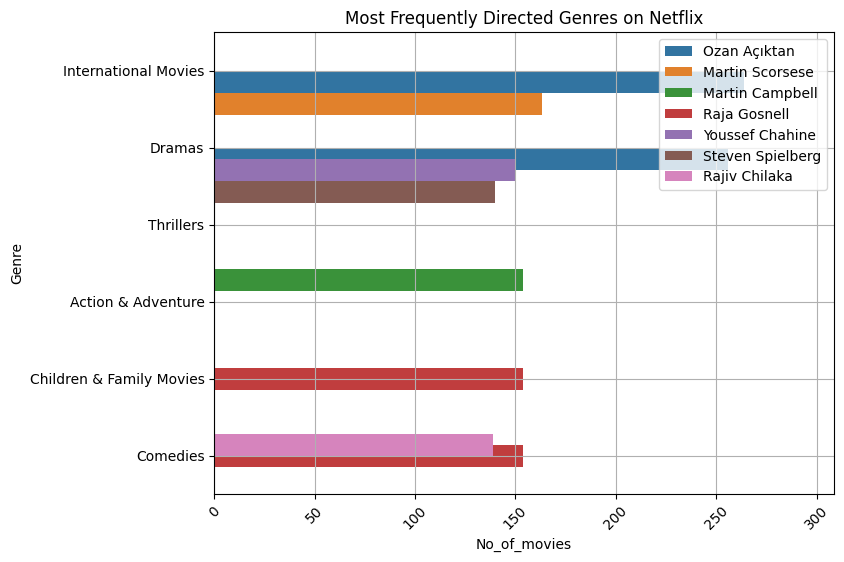

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(data=top_directors,y="Genre",x="No_of_movies",hue="Directors",width=2).set_title("Most Frequently Directed Genres on Netflix")
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.grid()
plt.show()

Hence, Netflix has most International Movies directed by Ozan Aciktan followed by Martin Scorsese. Netflix has most Comedy movies directed by Rajiv Chilaka and Raja Gosnell. In Action and Adventure Martin Campbell has the highest number of movies on Netflix.Ozan Aciktan has high number of movies in Dramas as well

## <font color="red" face='georgia'>Business Insights</font>

1. Most of the content is available in the form of Movies having duration of 90 mins (1.5 Hrs).
2. Majority content is coming from United States & United Kingdom.
3. In Movies, most popular genre is Action & Adventure. In TV Shows, most popular genre is British T.V Shows.
4. Most of the content was uploaded during the year of 2018-2021.
5. TV-MA is the most popular rating among other ratings.
6. Most movies are available in 90 min duration, while T.V Shows are available in single season.

## <font color="green" face='georgia'>Recommendations</font>


1. Netflix should focus on adding more movies with durations ranging from 90 to 95 minutes.

2. Generally, Q4 and Q1 are the best times to upload content to the platform.

3. TV-MA, TV-14, TV-PG, and R are some of the most popularly rated contents that should be available.

4. Action and Adventure, British TV Shows, Anime Series, and Comedy are a few of the genres that should be featured on the platform.

5. Netflix should upload more movies and content from those countries that have lower content on the platform, such as Argentina, Belgium, Italy, the Philippines, etc.


6. We can observe that people prefer watching their local actors movies. So Netflix can try to include Actors from those countries that have low content on the platform, geography-wise. So that more viewers from such countries get encouraged to watch shows and movies of their favorite local actors.


7. As per the observation, the following ratings have the lowest contribution genre-wise: G,TV-Y7-FV, UR, and NC-17. Hence, Netflix should upload more of such content.


8. For the USA audience, 80–120 minutes is the recommended length for movies, and Kids TV Shows are also popular along with the genres in the first point, hence recommended. For the UK audience, the recommended length for movies is the same as that of the USA (80–120 minutes).


9. The target audience in the USA and India is recommended to be 14+ and above, while for the UK, it is recommended to be completely mature or R content.